In [1]:
genes = ["PP0147", "PP1416", "PP1417", "PP1418", "PP1419"]


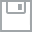
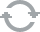
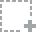
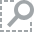
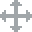
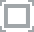
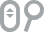
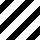
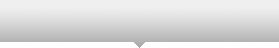
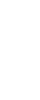
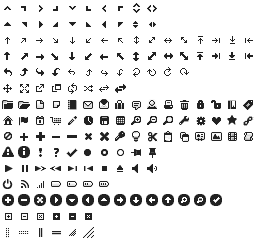
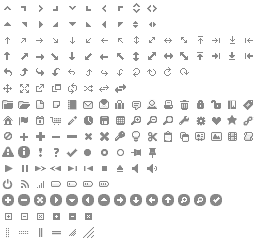
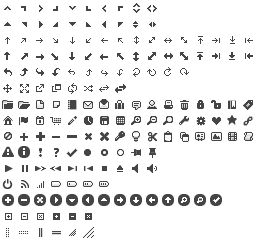
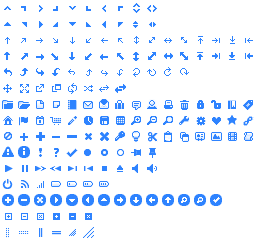
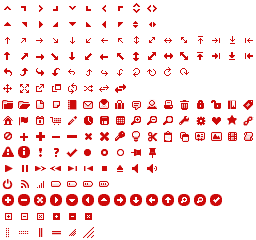
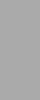
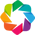
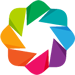

In [2]:
from cameo import load_model

In [3]:
model = load_model("iJP962.json")

In [4]:
for reaction in model.metabolites.cit_e.reactions:
    if not reaction.id.startswith("EX_"):
        if len(reaction.genes) > 0:
            reaction.gene_reaction_rule = reaction.gene_reaction_rule + " and PP1419"
        else:
            reaction.gene_reaction_rule = "PP1419"

In [5]:
from cobra.manipulation.delete import find_gene_knockout_reactions

In [6]:
model.reactions.EX_glc__D_e.lower_bound = 0
model.reactions.EX_cit_e.lower_bound = -10

In [7]:
model.reactions.EX_na1_e.lower_bound = -10
model.reactions.EX_mg2_e.lower_bound = -10

In [8]:
model.add_demand(model.metabolites.mg2_e)
model.add_demand(model.metabolites.na1_e)

<Reaction DM_na1_e at 0x7fbdd8f3ec18>

In [9]:
model.medium

reaction_id               reaction_name  lower_bound  upper_bound
0       EX_pi_e  Orthophosphate[e] exchange      -999999       999999
1   EX_EC9324_e         Biomass[e] exchange      -999999       999999
2      EX_cit_e         Citrate[e] exchange          -10       999999
3      EX_h2o_e             H2O[e] exchange      -999999       999999
4      EX_mg2_e       Magnesium[e] exchange          -10       999999
5      EX_na1_e          Sodium[e] exchange          -10       999999
6      EX_nh4_e            NH4+[e] exchange      -999999       999999
7      EX_so4_e         Sulfate[e] exchange      -999999       999999
8     EX_Fe3+_e            Iron[e] exchange      -999999       999999
9        EX_h_e              H+[e] exchange      -999999       999999
10      EX_o2_e          Oxygen[e] exchange      -999999       999999
11     EX_ca2_e                    EX_ca2_e        -1000         1000

In [10]:
from cameo.util import TimeMachine

In [11]:
model.reactions.CITt6.lower_bound = 0
model.reactions.CITt6.upper_bound = 0

In [12]:
from functools import partial

In [13]:
for gene in genes:
    with TimeMachine() as tm:
        for reaction in find_gene_knockout_reactions(model, [model.genes.get_by_id(gene)]):
            tm(do=partial(setattr, reaction, 'lower_bound', 0), undo=partial(setattr, reaction, 'lower_bound', reaction.lower_bound))
            tm(do=partial(setattr, reaction, 'upper_bound', 0), undo=partial(setattr, reaction, 'upper_bound', reaction.upper_bound))   
        try:
            s = model.solve()
            print("Knockout %s: %.4f h-1" % (gene, s.f))
        except Exception as e:
            print("Knockout %s: 0 h-1" % gene)

Knockout PP0147: 0.5640 h-1
Knockout PP1416: 0.5640 h-1
Knockout PP1417: 0.5640 h-1
Knockout PP1418: 0.5640 h-1
Knockout PP1419: 0 h-1
